In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,NaN,72.0,35.0,NaN,NaN,0.627,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,NaN,183.0,64.0,0.0,NaN,NaN,0.672,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,NaN,35.0,NaN,NaN,2.288,NaN
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,NaN,122.0,70.0,27.0,NaN,NaN,0.340,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	152
float64		column 2	114
float64		column 3	76
float64		column 4	38
float64		column 5	304
float64		column 6	266
float64		column 7	38
float64		column 8	228


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,616.000000,654.000000,692.000000,730.00000,464.000000,502.000000,730.000000,540.000000
mean,3.733766,121.204893,68.913295,20.79726,76.286638,31.783068,0.470122,33.168519
std,3.306642,32.050222,19.664509,15.96249,103.937376,7.480474,0.328201,11.894376
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.250000,62.000000,0.00000,0.000000,27.400000,0.240000,24.000000
50%,3.000000,117.000000,72.000000,23.00000,40.000000,31.950000,0.372000,29.000000
75%,6.000000,141.000000,80.000000,32.75000,127.250000,36.250000,0.622750,41.000000
max,17.000000,198.000000,122.000000,99.00000,680.000000,55.000000,2.329000,81.000000


<AxesSubplot:>

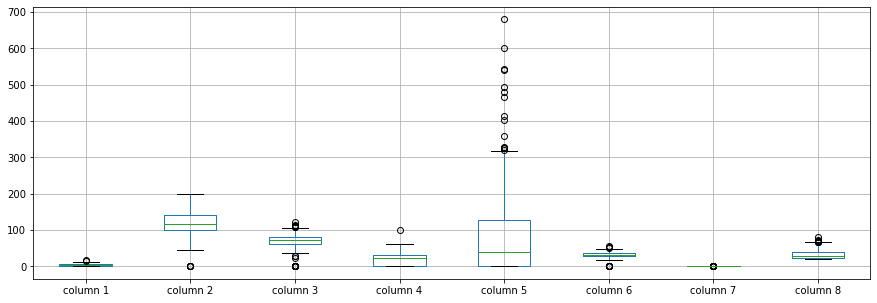

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.733766
column 2    121.204893
column 3     68.913295
column 4     20.797260
column 5     76.286638
column 6     31.783068
column 7      0.470122
column 8     33.168519
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.082712,0.108435,-0.116673,-0.089026,0.008413,-0.048421,0.529671
column 2,0.082712,1.000000,0.156262,0.025430,0.260392,0.137773,0.076702,0.259057
column 3,0.108435,0.156262,1.000000,0.196430,0.072479,0.293047,0.083169,0.230965
column 4,-0.116673,0.025430,0.196430,1.000000,0.462748,0.307102,0.160737,-0.159019
column 5,-0.089026,0.260392,0.072479,0.462748,1.000000,0.180940,0.123188,-0.071350
column 6,0.008413,0.137773,0.293047,0.307102,0.180940,1.000000,0.105745,0.018784
column 7,-0.048421,0.076702,0.083169,0.160737,0.123188,0.105745,1.000000,0.056609
column 8,0.529671,0.259057,0.230965,-0.159019,-0.071350,0.018784,0.056609,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [8,8+46,8+46+46,8+46+46+46,8+46+46+46+46,8+46+46+46+46+46,8+46+46+46+46,8+46+46+46,8+46+46,8+46,8], vae_layer = False, seed = 46)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 317.5892616907756
Epoch: 1 , loss: 317.25131066640216
Epoch: 2 , loss: 317.69538402557373
Epoch: 3 , loss: 316.6410026550293
Epoch: 4 , loss: 313.7960729598999
Epoch: 5 , loss: 291.39332898457843
Epoch: 6 , loss: 266.94647947947186
Epoch: 7 , loss: 264.88496017456055
Epoch: 8 , loss: 260.38459332784015
Epoch: 9 , loss: 250.85663032531738
Epoch: 10 , loss: 251.59694163004556
Epoch: 11 , loss: 251.41918818155924
Epoch: 12 , loss: 247.9734369913737
Epoch: 13 , loss: 250.48475297292075
Epoch: 14 , loss: 242.32727972666422
Epoch: 15 , loss: 239.9693234761556
Epoch: 16 , loss: 234.55267397562662
Epoch: 17 , loss: 234.51010990142822
Epoch: 18 , loss: 233.01268450419107
Epoch: 19 , loss: 229.47351551055908
Epoch: 20 , loss: 220.7225751876831
Epoch: 21 , loss: 217.99068291982016
Epoch: 22 , loss: 220.47120253245035
Epoch: 23 , loss: 221.10596450169882
Epoch: 24 , loss: 216.42040920257568
Epoch: 25 , loss: 210.84

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,-147.920345,0.000000,0.0,0.077429,-33.520729,0.0,-49.920436
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,-7.916082,0.000000,0.000000,0.0,0.079602,-23.218452,0.0,-31.918113
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,-39.917912,0.0,-167.920616,-43.018770,0.0,-32.918380
...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
764,-1.921782,0.000000,0.000000,0.0,0.074890,-36.723485,0.0,-26.923193
765,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
766,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3178.436144228286, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.5502283718433931

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,0.079655,72.000000,35.0,0.077429,0.079271,0.627,0.079564
1,1.000000,85.000000,66.000000,29.0,0.000000,26.600000,0.351,31.000000
2,0.083918,183.000000,64.000000,0.0,0.079602,0.081548,0.672,0.081887
3,1.000000,89.000000,66.000000,23.0,94.000000,28.100000,0.167,21.000000
4,0.000000,137.000000,0.082088,35.0,0.079384,0.081230,2.288,0.081620
...,...,...,...,...,...,...,...,...
763,10.000000,101.000000,76.000000,48.0,180.000000,32.900000,0.171,63.000000
764,0.078218,122.000000,70.000000,27.0,0.074890,0.076515,0.340,0.076807
765,5.000000,121.000000,72.000000,23.0,112.000000,26.200000,0.245,30.000000
766,1.000000,126.000000,60.000000,0.0,0.000000,30.100000,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_AL_20.xlsx", index=False, header=False)